 <h1><center>HR Analysis </center></h1>

### Introduction:
In this Jupyter notebook I'm going to analyze a dataset of employees in a company to understand why some employees leave the company, we have many data about employees like their salary, rate of promotions they get from work, their satisfaction level,the number of hours they work per month, the department where they work etc.
So the problem to solve: Why do these employees leave the company? What make them leave?

So I'm going to import my dataset to work on and the libraries I need to handle these data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:/Users/user/Desktop/Spb/HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


This is how my dataset looks like, in the column "left" when left = 1 means that the employee left, when left = 0 means that the employee stayed in the company, other attributes give details about the employee, like the number of hours worked per month, the number of projects and time spent ...etc. So I want to explore this dataset for more infos      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


so I have 8 attributes and 14999 entities so 14999 employees, so all attributes have the same number of entities, so we don't have any missing values.
So the next first thing I want to know is how many employees left the company? 

In [8]:
 df[df["left"]==1]["left"].count()

3571

The number of employees who left the company is: 3571 

Now I want to have the first statistical analysis about the employees who left and those who stayed comparing them by the number of projects they worked on in general, the promotions and working hour, so I will get the general statistics by checking the mean (average value) of each    

In [9]:
df.groupby(["left"]).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**First impression:**<br>

The first impression we get and we notice is that the satisfaction level is 66% for employees who stayed in the company, so they are satisfied, but the satisfaction level for employees who left the company is low (44%)<br>
The employees who left had to work more hours in a month than employees who are still in the company<br>
Employees who left didn't almost get any promotion in the last 5 years otherwise, the employees who are still working got more promotions<br>
Employees who left had slightly more projects to work on than the employees who are still working in the company, but the difference is very low. same for the time spent in the company.

Now the next thing I want to see is if the salary caused the departure of these employees, that's the first logical hypothesis we can make!
To do so I decided to use bar graphs to analyze and visualize that

<AxesSubplot:title={'center':'impact of salary on employees departure'}, xlabel='salary', ylabel='num of employees'>

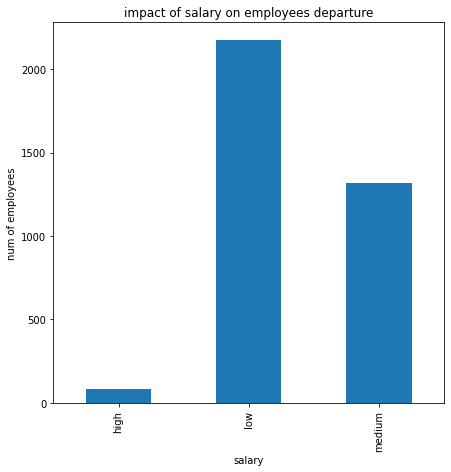

In [13]:
df[df["left"]==1].groupby(["salary"])["left"].count().plot(kind="bar", figsize=(7,7), ylabel="num of employees", title="impact of salary on employees departure")

It seems that nobody with a high salary left the company, those who had a low and medium salary all left the company, so salary had a big impact on that  

I want to compare the same thing but including employees who didn't leave, to check their salary in paralell with employees who left:

<AxesSubplot:xlabel='salary'>

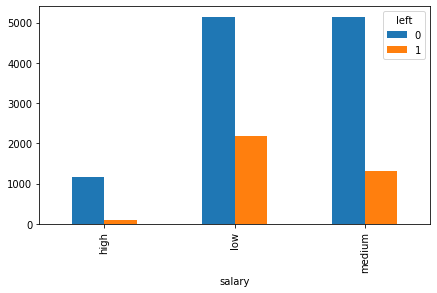

In [24]:
pd.crosstab(df["salary"], df["left"]).plot(kind="bar", figsize=(7,4))

In another hand employees who stayed in the company, we have more than 1000 of them who are highly paid, but the majority are with a low and medium salary also but they stayed! so let's check why?
for this I want to understand what are other criteria that made the employees stayed, so I did here some statistical analysis for employees who stayed comparing to their salary   

In [25]:
df[df["left"]==0].groupby(["salary"]).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.651879,0.708606,3.789610,200.348052,3.693506,0.166234,0.0,0.062338
low,0.668103,0.717028,3.784603,198.617418,3.253888,0.183709,0.0,0.010109
medium,0.668875,0.715461,3.788068,199.214272,3.435952,0.168259,0.0,0.034315


So those who stayed in the company, even with a low and medium salary they stayed and they are numerous more than those with a high salary, so after some statistical analysis they are more satisfied with their job with a rate of 66%, they have the same number of projects with those with high salaries but worked with fewer hours in the month and made more work accidents, and in addition to that they spend less time in the company comparing with those with high salary, so they could be beginners with less experience, that's why they stayed and were satisfied.    

Now I want to see why the employees with a low and medium salary left, why they didn't stay like other employees who had even  a low and medium salary, what are the other criteria that made them decide to leave the company, so I do the same statistics like in the previous one and I compare   

In [27]:
df[df["left"]==1].groupby(["salary"]).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.434512,0.644024,3.451220,193.097561,3.682927,0.000000,1.0,0.000000
low,0.441248,0.716994,3.836096,206.631215,3.874770,0.043738,1.0,0.006446
medium,0.438550,0.724571,3.912680,209.610478,3.891420,0.056188,1.0,0.003797


so if we compare for those who left, with a low and medium salary they worked even more than those with a high salary comparing to employees who stayed and had even more projects, so a lot of task to do with less salary.and in addition to that they were even more experienced, they spend more time in the company, so it seems logic.

So now I want to see the distribution of these employees who left with their departement, so how many employees left in each department: 

<AxesSubplot:title={'center':'num of employees left in each department'}, xlabel='Department', ylabel='num of employees'>

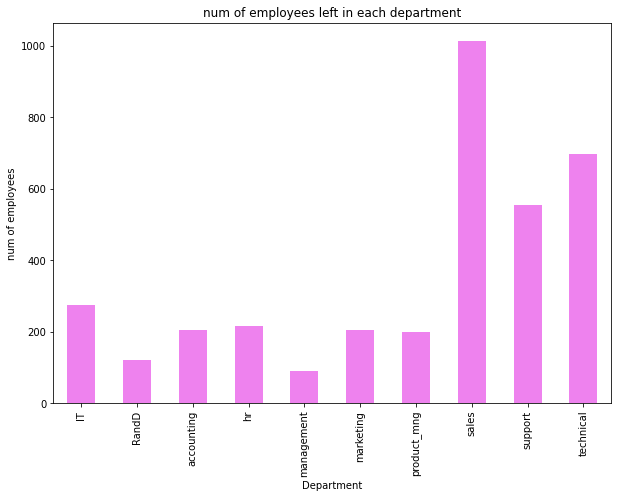

In [34]:
df[df["left"]==1].groupby(["Department"])["left"].count().plot(kind="bar", figsize=(10,7), color="violet", ylabel="num of employees" ,title="num of employees left in each department")


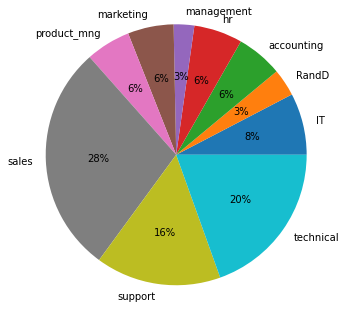

In [7]:
dep_labels=df[df["left"]==1].groupby(["Department"])["salary"].count().index
plt.axis=("equal")
plt.pie(df[df["left"]==1].groupby(["Department"])["salary"].count(),labels=dep_labels, radius=1.5, autopct="%0.0f%%")
plt.show()

So here we notice that most of the employees who left were working in the sales department with more than 1000 with a rate of 28%  

Now I want to see why the majority of employees who left are from the Sales department, so firstly I want to compare that with their salary in each department, see how these 2 impacts are related as we know that most of employees who left in all the company was because of the salary also:    

<AxesSubplot:xlabel='Department,salary'>

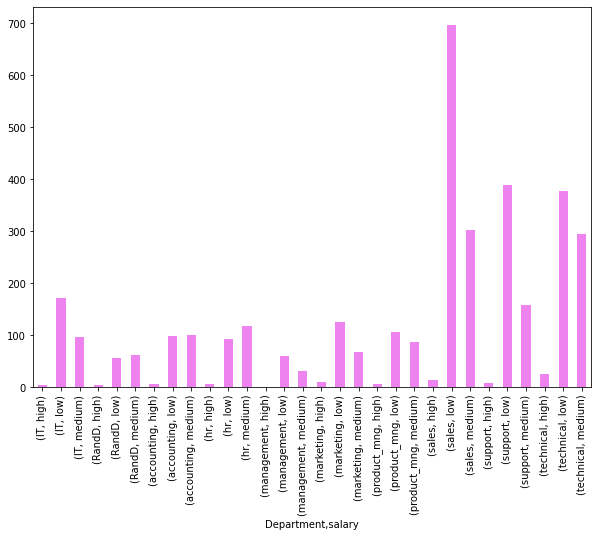

In [139]:
df[df["left"]==1].groupby(["Department","salary"])["left"].count().plot(kind="bar", figsize=(10,7), color="violet")

if we go to sales department in the chart, we find that the majority of employees who left are those who had the lowest salary and who are from the sales department, that seems logical as we knew from my previous analysis that salary had an impact on employees who left. It seems the lowest salary in the company is given for employees in the sales department  

### Conclusion:
So Employees who left the company, they left because of the salary, they didn't have a high salary and they are even the experienced ones, they also worked on many projects with more working hours per week than the others.<br>
Employees who left are mostly from the sales department, lower salary in that department seems the lowest salary in the company.<br>
Employees who stayed in the company, those with high salary stayed all in the company, those with low and medium salary who stayed in the company, they stayed because they are with less experience and got satisfied with there work, also they did a lot of work accident and some of them got even some promotion in the last 5 years.   